In [1]:
import csv

with open('C:/Users/al797/Desktop/People.csv', mode='r') as file:
    reader = csv.DictReader(file)
    People = [row for row in reader]

In [2]:

# Inizializza un dizionario per contare i valori mancanti per ogni colonna
missing_counts = {column: 0 for column in People[0].keys()}

# Itera attraverso le righe per contare i valori mancanti
for row in People:
    for column, value in row.items():
        if value == '' or value is None:  # Verifica se il valore è vuoto o `None`
            missing_counts[column] += 1

# Stampa i risultati
for column, count in missing_counts.items():
    print(f"Colonna '{column}': {count} valori mancanti")

Colonna 'PERSON_ID': 0 valori mancanti
Colonna 'PERSON_TYPE': 0 valori mancanti
Colonna 'RD_NO': 0 valori mancanti
Colonna 'VEHICLE_ID': 10696 valori mancanti
Colonna 'CRASH_DATE': 0 valori mancanti
Colonna 'CITY': 143920 valori mancanti
Colonna 'STATE': 141976 valori mancanti
Colonna 'SEX': 7154 valori mancanti
Colonna 'AGE': 160981 valori mancanti
Colonna 'SAFETY_EQUIPMENT': 1410 valori mancanti
Colonna 'AIRBAG_DEPLOYED': 10452 valori mancanti
Colonna 'EJECTION': 6705 valori mancanti
Colonna 'INJURY_CLASSIFICATION': 296 valori mancanti
Colonna 'DRIVER_ACTION': 109766 valori mancanti
Colonna 'DRIVER_VISION': 109884 valori mancanti
Colonna 'PHYSICAL_CONDITION': 109501 valori mancanti
Colonna 'BAC_RESULT': 108833 valori mancanti
Colonna 'DAMAGE_CATEGORY': 0 valori mancanti
Colonna 'DAMAGE': 74309 valori mancanti


In [3]:
def replace_nulls(ds, column_name, replacement_value):
    
    for record in ds:
        value = record[column_name].strip().lower() if record[column_name] else None
        
        if value in [None, "", "null", "none"]:
            record[column_name] = replacement_value

# Vehicles ID

#### SOSTITUISCO CON 0 Poichè non hanno la targa(Pedoni/bici..)

In [4]:
null_count = 0
for record in People:
    if not record["VEHICLE_ID"]:  
        null_count += 1
print(null_count)

10696


In [5]:
replace_nulls(People, 'VEHICLE_ID', '0')

In [6]:
null_count = 0
for record in People:
    if not record["VEHICLE_ID"]:  
        null_count += 1
print(null_count)

0


In [7]:
import random

# Trova tutte le righe che avevano un VEHICLE_ID mancante e sono state sostituite con '0'
replaced_rows = [record for record in People if record["VEHICLE_ID"] == '0']

# Controlla una riga a caso tra quelle modificate, se esistono
if replaced_rows:
    random_row = random.choice(replaced_rows)
    print("Esempio di riga con VEHICLE_ID sostituito:")
    print(random_row)
else:
    print("Non ci sono righe con VEHICLE_ID sostituito con '0'.")

Esempio di riga con VEHICLE_ID sostituito:
{'PERSON_ID': 'O249412', 'PERSON_TYPE': 'PEDESTRIAN', 'RD_NO': 'JA490660', 'VEHICLE_ID': '0', 'CRASH_DATE': '10/29/2017 01:13:00 PM', 'CITY': 'CHICAGO', 'STATE': 'IL', 'SEX': 'F', 'AGE': '41.0', 'SAFETY_EQUIPMENT': 'NONE PRESENT', 'AIRBAG_DEPLOYED': '', 'EJECTION': '', 'INJURY_CLASSIFICATION': 'NONINCAPACITATING INJURY', 'DRIVER_ACTION': 'UNKNOWN', 'DRIVER_VISION': 'MOVING VEHICLES', 'PHYSICAL_CONDITION': 'NORMAL', 'BAC_RESULT': 'TEST NOT OFFERED', 'DAMAGE_CATEGORY': 'OVER $1,500', 'DAMAGE': '2195.9304875307234'}


# City

#### SOSTITUISCO con CHICAGO (perchè è la moda)

In [8]:
null_count = 0
for record in People:
    if not record["CITY"]:  
        null_count += 1
print(null_count)

143920


In [9]:
replace_nulls(People, 'CITY', 'CHICAGO')

In [10]:
null_count = 0
for record in People:
    if not record["CITY"]:  
        null_count += 1
print(null_count)

0


# State

#### SOSTITUISCO con MODA

In [11]:
null_count = 0
for record in People:
    if not record["STATE"]:  
        null_count += 1
print(null_count)

141976


In [12]:
from collections import Counter

# Trova la moda della colonna 'STATE'
state_values = [record['STATE'] for record in People if record['STATE'] and record['STATE'].strip().lower() not in ["null", "none"]]
mode_state = Counter(state_values).most_common(1)[0][0]  # Trova il valore più comune


In [13]:
mode_state

'IL'

In [14]:
replace_nulls(People, 'STATE', 'IL')

In [15]:
null_count = 0
for record in People:
    if not record["STATE"]:  
        null_count += 1
print(null_count)

0


# Sex

#### SOSTITUISCO con la Moda

In [16]:
null_count = 0
for record in People:
    if not record["SEX"]:  
        null_count += 1
print(null_count)

7154


In [17]:
sex_values = [record['SEX'] for record in People if record['SEX'] and record['SEX'].strip().lower() not in ["null", "none"]]
mode_sex = Counter(sex_values).most_common(1)[0][0]  # Trova il valore più comune
mode_sex

'M'

In [18]:
replace_nulls(People, 'SEX', 'M')

In [19]:
null_count = 0
for record in People:
    if not record["SEX"]:  
        null_count += 1
print(null_count)

0


# Age

#### SOSTITUISCO con Mediana perchè la distribuzione non è normale

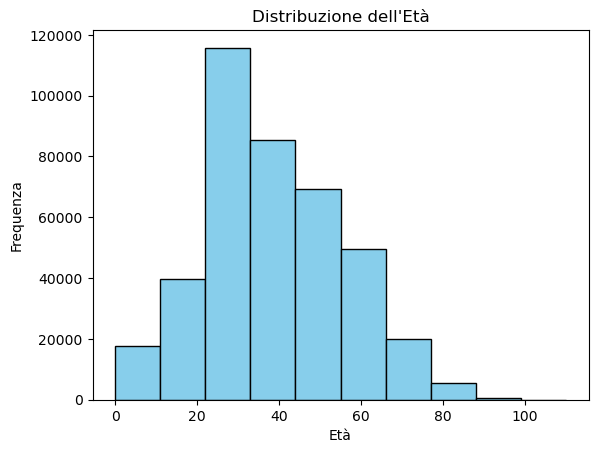

In [20]:
import matplotlib.pyplot as plt

# Estrai i valori numerici dalla colonna 'AGE', assicurandoci che siano validi
age_values = []
for record in People:
    try:
        # Converte l'AGE in float, ignorando i valori non numerici
        age = float(record['AGE'])
        age_values.append(age)
    except ValueError:
        # Se l'AGE non può essere convertito in float, lo salta
        pass

# Controlla se ci sono valori validi
if not age_values:
    print("Nessun dato valido trovato nella colonna 'AGE'.")
else:
    # Crea l'istogramma
    plt.hist(age_values, bins=10, color='skyblue', edgecolor='black')  # Puoi modificare il numero di bins se necessario

    # Aggiungi titoli e etichette
    plt.title('Distribuzione dell\'Età')
    plt.xlabel('Età')
    plt.ylabel('Frequenza')

    # Mostra il grafico
    plt.show()

In [21]:
null_count = 0
for record in People:
    if not record["AGE"]:  
        null_count += 1
print(null_count)

160981


In [22]:
import statistics

# Estrai i valori numerici dalla colonna 'AGE'
age_values = []
for record in People:
    try:
        # Converte l'AGE in float, ignorando i valori non numerici
        age = float(record['AGE'])
        age_values.append(age)
    except ValueError:
        # Se l'AGE non può essere convertito in float, lo salta
        pass

# Verifica che ci siano valori validi
if not age_values:
    print("Nessun dato valido trovato nella colonna 'AGE'.")
else:
    # Calcola la mediana
    median_age = statistics.median(age_values)
    print(f"La mediana dell'età è: {median_age}")

La mediana dell'età è: 36.0


In [23]:
replace_nulls(People, 'AGE', '36.0')

In [24]:
null_count = 0
for record in People:
    if not record["AGE"]:  
        null_count += 1
print(null_count)

0


# Safety_Equipment

#### SOSTITUISCO con USAGE UNKNOWN, (si potrebbero anche eliminare le righe), i pedoni/CICLISTI.... potrebbero avere come dispositivi di sicurezza delle giacche catarinfrangenti o simili

In [25]:
null_count = 0
for record in People:
    if not record["SAFETY_EQUIPMENT"]:  
        null_count += 1
print(null_count)

1410


In [26]:
replace_nulls(People, 'SAFETY_EQUIPMENT', 'USAGE UNKNOWN')

In [27]:
null_count = 0
for record in People:
    if not record["SAFETY_EQUIPMENT"]:  
        null_count += 1
print(null_count)

0


# Airbag_deployed

In [28]:
null_count = 0
for record in People:
    if not record["AIRBAG_DEPLOYED"]:  
        null_count += 1
print(null_count)

10452


In [29]:
for record in People:
    if not record["AIRBAG_DEPLOYED"] and record["PERSON_TYPE"] in ["BICYCLE", "PEDESTRIAN", "NON-MOTOR VEHICLE"]:
        record["AIRBAG_DEPLOYED"] = "NO AIRBAG"

#### SOPRA ho rimosso tutte le persone che non possono avere AIRBAG, SOTTO elimino le righe rimanenti

In [30]:
null_count = 0
for record in People:
    if not record["AIRBAG_DEPLOYED"]:  
        null_count += 1
print(null_count)

42


In [31]:
def remove_null_records(data):
    """
    Rimuove tutti i record dalla lista 'data' che hanno un valore nullo per la chiave 'AIRBAG_DEPLOYED'.
    
    Parametri:
    data (list): Lista di dizionari che rappresentano i record.
    
    Ritorna:
    list: La lista di record filtrata senza i valori nulli per 'AIRBAG_DEPLOYED'.
    """
    return [record for record in data if record["AIRBAG_DEPLOYED"]]

In [32]:
People = remove_null_records(People)

In [33]:
null_count = 0
for record in People:
    if not record["AIRBAG_DEPLOYED"]:  
        null_count += 1
print(null_count)

0


# Ejection

#### Sostituisco con NO VEHICLE in quanto non erano sui veicoli

In [34]:
null_count = 0
for record in People:
    if not record["EJECTION"]:  
        null_count += 1
print(null_count)

6670


In [35]:
def replace_nulls2(People, ejection_column, default_value):
    for record in People:
        if not record[ejection_column]:  # Se il valore è mancante
            if record["PERSON_TYPE"] == "PASSENGER":
                record[ejection_column] = "UNKNOWN"
            else:
                record[ejection_column] = default_value

In [36]:
replace_nulls2(People, 'EJECTION', 'NO VEHICLE')

In [37]:
null_count = 0
for record in People:
    if not record["EJECTION"]:  
        null_count += 1
print(null_count)

0


# Injury_classification

#### SOSTITUISCO con NO INDICATION OF INJURY

In [38]:
null_count = 0
for record in People:
    if not record["INJURY_CLASSIFICATION"]:  
        null_count += 1
print(null_count)

261


In [39]:
replace_nulls(People, 'INJURY_CLASSIFICATION', 'NO INDICATION OF INJURY')

In [40]:
null_count = 0
for record in People:
    if not record["INJURY_CLASSIFICATION"]:  
        null_count += 1
print(null_count)

0


# Driver_action

#### SOSTITUISCO con NONE i NON GUIDATORI e con UNKNOWN i guidatori di NON CONTACT VEHICLE

In [41]:
null_count = 0
for record in People:
    if not record["DRIVER_ACTION"]:  
        null_count += 1
print(null_count)

109735


In [42]:
# Itera attraverso ogni record nel dataset
for record in People:
    # Se il valore di DRIVER_ACTION è mancante
    if not record["DRIVER_ACTION"] or record["DRIVER_ACTION"].strip().lower() in ["", "null", "none"]:
        # Sostituisci con "UNKNOWN" se PERSON_TYPE è "NON-CONTACT VEHICLE"
        if record["PERSON_TYPE"].strip().upper() == "NON-CONTACT VEHICLE":
            record["DRIVER_ACTION"] = "UNKNOWN"
        else:
            # Altrimenti, sostituisci con "NONE"
            record["DRIVER_ACTION"] = "NONE"


In [43]:
null_count = 0
for record in People:
    if not record["DRIVER_ACTION"]:  
        null_count += 1
print(null_count)

0


# Driver_vision

#### SOSTITUISCO con NOT APPLICABLE perchè nessuno guida un veicolo tranne quelli NON_CONTACT VEHICLE in cui metto UNKNOWN

In [44]:
null_count = 0
for record in People:
    if not record["DRIVER_VISION"]:  
        null_count += 1
print(null_count)

109852


In [45]:
person_types_with_nulls = {}

for record in People:
    if not record["DRIVER_VISION"]:
        person_type = record["PERSON_TYPE"]
        if person_type not in person_types_with_nulls:
            person_types_with_nulls[person_type] = 0
        person_types_with_nulls[person_type] += 1

print(person_types_with_nulls)

{'PASSENGER': 108814, 'PEDESTRIAN': 677, 'NON-MOTOR VEHICLE': 263, 'BICYCLE': 95, 'NON-CONTACT VEHICLE': 3}


In [46]:
for record in People:
    if not record["DRIVER_VISION"]:  # Se il valore è mancante
        if record["PERSON_TYPE"] == "NON-CONTACT VEHICLE":
            record["DRIVER_VISION"] = "UNKNOWN"
        else:
            record["DRIVER_VISION"] = "NOT APPLICABLE"

In [47]:
null_count = 0
for record in People:
    if not record["DRIVER_VISION"]:  
        null_count += 1
print(null_count)

0


# Physical_condition

#### SOSTITUOSCO con UNKNOWN i guidatori di non contact vehicle, Not applicable il resto


In [48]:
null_count = 0
for record in People:
    if not record["PHYSICAL_CONDITION"]:  
        null_count += 1
print(null_count)

109469


In [49]:
person_types_with_nulls = {}

for record in People:
    if not record["PHYSICAL_CONDITION"]:
        person_type = record["PERSON_TYPE"]
        if person_type not in person_types_with_nulls:
            person_types_with_nulls[person_type] = 0
        person_types_with_nulls[person_type] += 1

print(person_types_with_nulls)

{'PASSENGER': 108814, 'PEDESTRIAN': 311, 'NON-MOTOR VEHICLE': 258, 'BICYCLE': 83, 'NON-CONTACT VEHICLE': 3}


In [50]:
for record in People:
    if not record["PHYSICAL_CONDITION"]:  # Se il valore è mancante
        if record["PERSON_TYPE"] == "NON-CONTACT VEHICLE":
            record["PHYSICAL_CONDITION"] = "UNKNOWN"
        else:
            record["PHYSICAL_CONDITION"] = "NOT APPLICABLE"

In [51]:
null_count = 0
for record in People:
    if not record["PHYSICAL_CONDITION"]:  
        null_count += 1
print(null_count)

0


# BAC_result

#### SOSTITUISCO con NOt applicable in quanto nessuno è conducente

In [52]:
null_count = 0
for record in People:
    if not record["BAC_RESULT"]:  
        null_count += 1
print(null_count)

108814


In [53]:
person_types_with_nulls = {}

for record in People:
    if not record["BAC_RESULT"]:
        person_type = record["PERSON_TYPE"]
        if person_type not in person_types_with_nulls:
            person_types_with_nulls[person_type] = 0
        person_types_with_nulls[person_type] += 1

print(person_types_with_nulls)

{'PASSENGER': 108814}


In [54]:
replace_nulls(People, 'BAC_RESULT', 'NOT APPLICABLE')

In [55]:
null_count = 0
for record in People:
    if not record["BAC_RESULT"]:  
        null_count += 1
print(null_count)

0


# Damage

#### SOSTITUISCO con MEDIA

In [56]:
null_count = 0
for record in People:
    if not record["DAMAGE"]:  
        null_count += 1
print(null_count)

74303


In [57]:
person_types_with_nulls = {}

for record in People:
    if not record["DAMAGE"]:
        person_type = record["PERSON_TYPE"]
        if person_type not in person_types_with_nulls:
            person_types_with_nulls[person_type] = 0
        person_types_with_nulls[person_type] += 1

print(person_types_with_nulls)

{'DRIVER': 55117, 'PASSENGER': 13300, 'BICYCLE': 2113, 'PEDESTRIAN': 3680, 'NON-MOTOR VEHICLE': 87, 'NON-CONTACT VEHICLE': 6}


In [58]:
for record in People:
    if not record["DAMAGE"]:  # Controlla se il valore è mancante
        if record["PERSON_TYPE"] in ["BICYCLE", "PEDESTRIAN", "NON-MOTOR VEHICLE", "NON-CONTACT VEHICLE"]:
            record["DAMAGE"] = "NOT APPLICABLE"  # Sostituisci con "NOT APPLICABLE"

In [59]:
null_count = 0
for record in People:
    if not record["DAMAGE"]:  
        null_count += 1
print(null_count)

68417


In [60]:
person_types_with_nulls = {}

for record in People:
    if not record["DAMAGE"]:
        person_type = record["DAMAGE_CATEGORY"]
        if person_type not in person_types_with_nulls:
            person_types_with_nulls[person_type] = 0
        person_types_with_nulls[person_type] += 1

print(person_types_with_nulls)

{'$500 OR LESS': 68417}


In [61]:
replace_nulls(People, 'DAMAGE', '250.00')

In [62]:
null_count = 0
for record in People:
    if not record["DAMAGE"]:  
        null_count += 1
print(null_count)

0


#### APPROSSIMO a due cifre decimali i costi

In [63]:
for record in People:
    if record["DAMAGE"] is not None:  # Controlla se il valore non è mancante
        try:
            # Prova a convertire il valore in float, quindi approssima a due cifre decimali
            record["DAMAGE"] = round(float(record["DAMAGE"]), 2)
        except ValueError:
            # Gestisce i casi in cui il valore non è convertibile in float (rimane inalterato)
            pass

# FINE

In [64]:

# Definisci il percorso in cui vuoi salvare il file
file_path = "C:/Users/al797/Desktop/People_cleaned.csv"  # Sostituisci con il percorso del desktop

# Salva il dataset in un file CSV
with open(file_path, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=People[0].keys())
    writer.writeheader()
    writer.writerows(People)

print(f"File salvato con successo in: {file_path}")

File salvato con successo in: C:/Users/al797/Desktop/People_cleaned.csv
